# Text Classification Discussion
This notebook discusses a machine learning workflow using a text classification example. From this flow, we will discuss following area. Hope we have a good starting point and later explore other interesting ideas.

* [1.0 Data Preprocessing](#H1.0)
  * [1.1 Data Load](#H1.1)
  * [1.2 Data Check](#H1.2)
* [2.0 Feature Generation](#H2.0)
* [3.0 Train & Test Split](#H3.0)
* [4.0 Model Fitting](#H4.0)
  * [4.1 Model Examination](#H4.1)
  * [4.2 Model Performance](#H4.2)
* [5.0 Final Note](#H5.0)

We are using some news text with categories for this discussion. This data originally is from Kaggle to classify text into different news categories. Since we are not joining the kaggle competition so we will only do our own validation test for our discussion here.  So please download this file and put it here under `./data` directory for notebook access.

# Reference
- [How to deal with imbalanced data in Python](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb)
  - [Handling_Imbalanced_Data_in_Python](https://github.com/jackty9/Handling_Imbalanced_Data_in_Python/blob/master/Dealing_with_imbalanced_dataset.ipynb)
- [statistical_inference/model_selection](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

In [21]:
# Expand the viewing area with no Margin
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
import numpy as np
import pandas as pd
import pandasql as psql
import sklearn
import plotly.express as px
import hashlib
import pickle
import sys
import os

## 1.0 Data Preprocessing <a class="anchor" id="H1.0"></a>
In a more sophiscated ML workflow, there are a lot more other preprocessing steps e.g. checking for data corruption due to format or encoding issues. Typically we call this an ETL process. The data file is already cleaned, so we only need do some simple check.

- Make sure the notebook can see the data file under `./data` before we proceed further.
- We found the file has 200853 lines

In [25]:
print(os.listdir("data"))

['News_Category_Dataset_v2.json', '_placeholder']


In [26]:
%%sh
wc -l ./data/*.json

200853 ./data/News_Category_Dataset_v2.json


### 1.1 Data Load <a class="anchor" id="H1.1"></a>
- Load the data file into dataframe to do some data check.
- In the subsequent steps, we will need two additional fields
  - `text` is combined text from `authors`, `headline` and `short_description` with a separator.
  - `hash_head_desc` is the hash code for the `text` to simplify the cardinality analysis.

In [27]:
df = pd.read_json("./data/News_Category_Dataset_v2.json", lines=True)
df['text'] =  df['authors'] + " : " + df["headline"] + " : " + df["short_description"]
df['hash_head_desc'] = pd.Series(hashlib.md5(row.text.encode()).hexdigest() for _,row in df.iterrows())
df

,category,headline,authors,link,short_description,date,text,hash_head_desc
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,Melissa Jeltsen : There Were 2 Mass Shootings ...,51bdfd10981bbec877ecbf126a90cc76
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Andy McDonald : Will Smith Joins Diplo And Nic...,cf7fcd4d97384843b7acc5d9e5974713
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Ron Dicker : Hugh Grant Marries For The First ...,84295bc4366804457d5de41fa115a71a
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Ron Dicker : Jim Carrey Blasts 'Castrato' Adam...,3ab20d8fbf5e4a7f9d0402d29b18fbce
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Ron Dicker : Julianna Margulies Uses Donald Tr...,bb22694105897d0683c54d92d528d583
...,...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,"Reuters, Reuters : RIM CEO Thorsten Heins' 'Si...",096c6cc0306b713dba9097e163e8df4f
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,: Maria Sharapova Stunned By Victoria Azarenk...,2320e159fd84626a658f794156dd907c
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,": Giants Over Patriots, Jets Over Colts Among...",ffe05e1025b04f85d30ec67503f0d50c
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,: Aldon Smith Arrested: 49ers Linebacker Bust...,4674dffc4780c2acd4621e24371e6252


### 1.2 Data Check<a class="anchor" id="H1.2"></a>
- We found 200853 rows and 6 + 2 derived columns that matched with `wc` output. i.e. all lines are parsed correctly.
- For better clarity, we assign correct data type to each columns.
- We found 
  - it has 41 unique `category`.
  - it has 199344 unique `headline`, and the most popular headline shared 90 articles.
  - it has 27993 unique `authors`, and the most popular author wrote 36620 articles.
  - it has 200812 unique `link` i.e. some articles shared the same link and mostly 2 times.
  - it has 178353 unique `short_description` and the most popular description has repeated 19712 times.
    - Might need to dig into what description has repeated that many times.
  - For the derived `text`, it has 200365 unique content, so after combined with `authors` and `headline`, the combined text has not repeated many times, but 46 times the most. This fact is confirmed by the hash_head_desc that also repeated 31 times. So the hashcode has generated unique code for the combined text.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
 6   text               200853 non-null  object        
 7   hash_head_desc     200853 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 12.3+ MB


In [29]:
df = df.astype(
    {'category':'category', 
     'headline':'string', 
     'authors':'string', 
     'link':'string',
     'short_description':'string',
     'text' : 'string',
     'hash_head_desc' : 'string',
     'date':'datetime64'})
df.describe(include='all', datetime_is_numeric=True)

,category,headline,authors,link,short_description,date,text,hash_head_desc
count,200853,200853,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,NaN,200393,200393
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://d.repubbl...,,NaN,Alanna Vagianos : The Funniest Tweets From Wom...,70cb43668e561a35c2640884f7a66324
freq,32739,90,36620,2,19712,NaN,31,31
mean,NaN,NaN,NaN,NaN,NaN,2015-02-06 05:55:12.542008576,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2013-07-18 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2015-01-25 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2016-08-19 00:00:00,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00,NaN,NaN


  - Here we have the same `text` have been assigned to 2 categories.

In [30]:
psql.sqldf("""
        select text, length(text) as len,
        hash_head_desc,
        count(distinct category) cat_cnt
        from df
        group by text
        having cat_cnt > 1
        order by len, cat_cnt desc""")

,text,len,hash_head_desc,cat_cnt
0,"Gary Snyder, ContributorWriter and Media Strat...",57,a230f534cf3b5fc8a75c6cc07ec067c3,3
1,"Marcia Liss, Contributor(Almost) Famous Cartoo...",62,141c178e9e314ba350b4a01284a929db,2
2,"Michael Møller , ContributorDirector General o...",101,8b0de4e5c60255927a7e8e612c0d8165,2
3,Daniel Marans and Nick Baumann : The Real Hist...,156,32fcfa84045f6ba6b1a1e12fc04b7262,2
4,: Is Prostitution Just Another Job? : Chelsea...,164,b62591a46c137ba51e91d6adb6d01070,2
5,": Ikea Bag Dress Is Massive, In Need Of A Goo...",194,38adf99d8585ea9d2dc3b54de2f093bf,2
6,: The Sanders Campaign’s Sexist New Argument:...,200,08a2bae7be4f9894e285c6c0f62ca0aa,2
7,"Kitchen Daily, Kitchen Daily : Stylish Yellow ...",203,33c704af919753710f7948f8621657f3,2
8,": VietJetAir, Vietnamese Airline, Fined For I...",204,0ceeb858fabc84e00f17f8cfd34c96ad,2
9,Julee Wilson : Kelly Rowland's Birthday: Singe...,207,fd523cf544054efb4876b7a22186aa53,2


  - Here we chose one to examine how it is assigned.
  - The same text has been assigned to both `STYLE & BEAUTY` and `MONEY`.
  - Since there are only 12 cases, so this is not serious and will not affect the ML process much. One non-technical, business concern is that news may be classified into multiple `category` but the data seems didn't capture this characteristics.

In [31]:
psql.sqldf("""select text, * from df where hash_head_desc = "f780609f82dea243e621d4eb8ce8a475" """)

,text,category,headline,authors,link,short_description,date,text,hash_head_desc
0,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",STYLE & BEAUTY,Could You Go a Year Without Buying Anything Ne...,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",https://www.huffingtonpost.com/entry/saving-mo...,There is one thing that sets me apart from the...,2012-07-27 00:00:00.000000,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",f780609f82dea243e621d4eb8ce8a475
1,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",MONEY,Could You Go a Year Without Buying Anything Ne...,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",https://www.huffingtonpost.com/entry/saving-mo...,There is one thing that sets me apart from the...,2012-07-25 00:00:00.000000,"Katy Wolk-Stanley, Contributor\nBlogger, The N...",f780609f82dea243e621d4eb8ce8a475


  - After the basic data check, now we extract only the `text` and its corresponding `category` and try to predict the `category` with a given text.
  - We noticed that there are $200853-200383=470$ duplicates `text` and `category` combined, so we only train the ML model with no duplicates.
  - Finally we have 200383 rows of data to use.

In [32]:
train_df = psql.sqldf("""select distinct category, text from df""")
len(train_df), len(df)

(200407, 200853)

In [33]:
train_df.head()

,category,text
0,CRIME,Melissa Jeltsen : There Were 2 Mass Shootings ...
1,ENTERTAINMENT,Andy McDonald : Will Smith Joins Diplo And Nic...
2,ENTERTAINMENT,Ron Dicker : Hugh Grant Marries For The First ...
3,ENTERTAINMENT,Ron Dicker : Jim Carrey Blasts 'Castrato' Adam...
4,ENTERTAINMENT,Ron Dicker : Julianna Margulies Uses Donald Tr...


  - Here we check the number of `text` per each `category`. The data set is fairly imbalanced (`POLITICS` has 32722 & `EDUCATION` has only 1004). This will skew the model toward `category` with huge number of articles. `POLITICS` will be overly represented and `EDUCATION` will be under represent to the model. We will have the treatment on this data before we build the ML model.

In [34]:
psql.sqldf("""
        select category, count(*) text_cnt
        from train_df
        group by category
        order by text_cnt desc""")

,category,text_cnt
0,POLITICS,32723
1,WELLNESS,17822
2,ENTERTAINMENT,16055
3,TRAVEL,9886
4,STYLE & BEAUTY,9519
5,PARENTING,8650
6,HEALTHY LIVING,6689
7,QUEER VOICES,6312
8,FOOD & DRINK,6226
9,BUSINESS,5935


## 2.0 Feature Generation <a class="anchor" id="H2.0"></a>

- We are using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create feature set from `text`.
  - [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) provides a convenient method to generate n-grams and stop-word filter.
    - Ref: [TF IDF | TFIDF Python Example](https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76) for an introduction.
  - TODO: [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) docstring provides basic understanding and should be good enough for this dataset. The best is to understand deeper into the algorithm used by `TfidfVectorizer` to convert `Text` into a feature vector.
- This generator has generated 3813 features.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(train_df.text).toarray()

In [15]:
feature_names = tfidf.get_feature_names()
features_df = pd.DataFrame(features, columns=feature_names)
print(features_df.shape)
features_df

(200407, 3813)


,000,10,10 things,10 ways,10 years,100,11,12,13,14,...,younger,youth,youtube,zach,zach carter,zeba,zeba blay,zero,zone,zupkus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  - Here we are doing undersampling to eqaulize number of articles used to represent each `category`. For those `cateogry` has huge number of articles, it will down sample to reduce it size.  For those `category` has small number of articles will be less affected with their size.
    - ref: [imblearn: under_sampling](https://imbalanced-learn.org/stable/under_sampling.html)
  - Second reason we do undersampling instead of oversampling as the data size is already big enough to handle by the computer with 64 GB of RAM.
  - We see that after the undersampling, the `category` sizes are more manageable.

In [16]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print(Counter(train_df.category))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(features_df, train_df.category)
print(Counter(y_train_under))

Counter({'POLITICS': 32723, 'WELLNESS': 17822, 'ENTERTAINMENT': 16055, 'TRAVEL': 9886, 'STYLE & BEAUTY': 9519, 'PARENTING': 8650, 'HEALTHY LIVING': 6689, 'QUEER VOICES': 6312, 'FOOD & DRINK': 6226, 'BUSINESS': 5935, 'COMEDY': 5166, 'SPORTS': 4884, 'BLACK VOICES': 4525, 'HOME & LIVING': 4163, 'PARENTS': 3900, 'THE WORLDPOST': 3664, 'WEDDINGS': 3651, 'IMPACT': 3459, 'DIVORCE': 3424, 'WOMEN': 3408, 'CRIME': 3402, 'MEDIA': 2813, 'WEIRD NEWS': 2670, 'GREEN': 2617, 'WORLDPOST': 2579, 'RELIGION': 2549, 'STYLE': 2247, 'SCIENCE': 2178, 'WORLD NEWS': 2176, 'TASTE': 2096, 'TECH': 2038, 'MONEY': 1707, 'ARTS': 1509, 'FIFTY': 1401, 'GOOD NEWS': 1398, 'ARTS & CULTURE': 1338, 'ENVIRONMENT': 1322, 'COLLEGE': 1144, 'LATINO VOICES': 1129, 'CULTURE & ARTS': 1029, 'EDUCATION': 1004})
Counter({'WELLNESS': 17822, 'ENTERTAINMENT': 16055, 'TRAVEL': 9886, 'STYLE & BEAUTY': 9519, 'PARENTING': 8650, 'HEALTHY LIVING': 6689, 'QUEER VOICES': 6312, 'FOOD & DRINK': 6226, 'BUSINESS': 5935, 'COMEDY': 5166, 'SPORTS': 488

## 3.0 Train & Test Split <a class="anchor" id="H3.0"></a>

- We are doing 80:20 split for train and test.
- We saved the train & test dataset in case we don't want to run the whole dataset at once to reduce memory requirement.
- We also save the dataset we need for the model fitting, in case we need to rerun model fitting only. This can help reduce the memory constraint in the later stage.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_under, y_train_under, test_size=0.2, random_state=0)
x_train.to_pickle('x_train')
x_test.to_pickle('x_test')
y_train.to_pickle('y_train')
y_test.to_pickle('y_test')
with open('feature_names', 'wb') as f:
   pickle.dump(feature_names, f)

## 4.0 Model Fitting <a class="anchor" id="H4.0"></a>

- Before we go for a more sophicated model, we first try GLM first to see how well it works with the data.
- [Stanford GLMnet](http://web.stanford.edu/~hastie/glmnet_python/index.html), called Elastic-Net, is a robust GLM implementation with combined ridge & lasso i.e. L2 & L1 regularization.
  - Ref: [glmnet vignette](https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html#Logistic-Regression)
  - Since we are dealing with classification, so we chose Logistic Regression for multinominal classification for the `category`.

$$
\min_{\beta_0, \beta} \frac{1}{N} \sum_{i = 1}^N \mathcal{L} (y_i, \beta_0 + \beta^T x_i)
+ \lambda [\frac{1}{2}(1 - \alpha)\| \beta \|_2^2 + \alpha \| \beta \|_1]
$$

were $\mathcal{L} (y_i, \beta_0 + \beta^T x_i)$ is the negative log-likelihood of observation $i$.

- The advantages of combined L2 & L1 regularization is that the L1 will help to reduce number of features and L2 will do a fine tunned optimization. The key for controlling both effects are $\lambda$ controlling the strength of overall regularization and $\alpha$ controlling the relative strength between L1 and L2.
- Note: since the [glmnet-py](https://github.com/bbalasub1/glmnet_python.git), the Python implementation, is not updated (R has the latest), so we can't use it directly. However - [sklearn.linear_model.LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) do have Elastic-Net option. The only draw back is that it doesn't expose access to all algorithm parameters so we cannot check the internal state of the finished optimization.
- The following step is optional in case you run the following in different notebook session.
  - In case this notebook uses much memory, here is a good point to Restart the Kernel to eliminate remnant memory in the process. This has accumulated 13G memory that we don't need in the following ML process.
  - Here we reload the datasets from previous ETL.

In [1]:
import numpy as np
import pandas as pd
import pandasql as psql
import sklearn
import plotly.express as px
import hashlib
import pickle
import sys
import os

x_train = pd.read_pickle('x_train')
x_test = pd.read_pickle('x_test')
y_train = pd.read_pickle('y_train')
y_test = pd.read_pickle('y_test')
with open('feature_names', 'rb') as f:
  feature_names = pickle.load(f)

In [2]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegressionCV(Cs=5,cv=5, 
                          penalty='elasticnet', 
                          solver='saga', verbose = 0, tol = 0.005,
                          multi_class='multinomial', n_jobs = -1,
                          max_iter=100, l1_ratios=[0.1])

- Here are all parameters, including default parameters, go into `LogisticRegressionCV`.

In [3]:
lr.get_params()

{'Cs': 5,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': [0.1],
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'penalty': 'elasticnet',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.005,
 'verbose': 0}

- Note: Using 3.8 GHz 12 cores i7 with 64 GB, the following code run for about 10hr 22min.
  - You may want to reduce `tol = 0.01` or lower to reduce the running time. If `tol` is set too low e.g. `0.001`, the model do not converge.
> CPU times: user 1d 19h 7min 53s, sys: 38.1 s, total: 1d 19h 8min 31s
<br>
> Wall time: 10h 22min 25s

In [4]:
%%time
lr.fit(x_train, y_train)

CPU times: user 1d 19h 7min 53s, sys: 38.1 s, total: 1d 19h 8min 31s
Wall time: 10h 22min 25s


LogisticRegressionCV(Cs=5, cv=5, l1_ratios=[0.1], multi_class='multinomial',
                     n_jobs=-1, penalty='elasticnet', solver='saga', tol=0.005)

### 4.1 Model Examination<a class="anchor" id="H4.1"></a>

- Here are the `Category` used in the multinominal classification.

In [5]:
lr.classes_

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN',
       'WORLD NEWS', 'WORLDPOST'], dtype=object)

- Here we have 41 $\beta$, the coefficents, for each class and for each feature. Each coefficent estimates the log odds to the change of the outcome, ref:[Interpret Logistic Regression Coefficient](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/). This is very helpful to interpret how the model fit with the data.

In [6]:
lr.coef_.shape, lr.coef_

((41, 3813),
 array([[-5.60293432e-01,  6.55452624e-01,  3.79350420e-01, ...,
          1.25425986e-01,  2.60710761e-01,  0.00000000e+00],
        [-1.44442024e-01, -1.37876027e+00, -1.00010965e-01, ...,
          0.00000000e+00, -1.34291748e-01,  0.00000000e+00],
        [-4.57923198e-01, -5.71578848e-01,  9.09402542e-01, ...,
         -4.20735582e-01, -1.18048894e-02, -7.37628423e-02],
        ...,
        [-1.77331557e+00, -2.04710202e-01,  7.14416901e-01, ...,
         -3.14771598e-08, -8.40147187e-02, -4.38743294e-02],
        [ 1.32727756e+00, -5.51301230e-01, -1.40013009e-01, ...,
          0.00000000e+00, -6.72223708e-01,  0.00000000e+00],
        [ 5.44701400e-01, -1.14412857e+00,  1.02304810e-01, ...,
         -4.75581912e-01,  1.12466958e-01, -7.00708958e-06]]))

- Here are the intercepts of the linear model. Since we are using fixed number of features, these reflects the fact that `text` sizes are different. These intercepts will normalize the effect from different `text` size so that the $\beta$ can reflect the effect of each word to the predict class.

In [7]:
lr.intercept_

array([-0.1942846 , -0.64611521,  0.61383667,  0.98175934, -0.6746454 ,
        0.43553446,  0.05488629, -0.97825027, -0.5374539 , -1.03087703,
        1.55393646, -0.61680765, -0.65357704,  0.32819703, -0.41790939,
        0.49490106,  0.96435185, -0.33876669,  0.02785853, -0.54666935,
        0.19983265, -0.70099055, -0.21164594, -0.28365215, -0.20325207,
        0.08022766,  0.30125545,  0.06006905,  0.75990872, -0.11838484,
       -0.16241986, -0.25744974, -0.18997094,  0.50559256,  0.27907529,
       -0.69107478,  0.15879011,  0.69323937,  0.20294246, -0.10648658,
        0.864489  ])

- Here we have 41 $\beta$ per each class. All features got utilitized by the model. We might need to reduce `l1_ratios` to increase the strength of L1 to reduce number of features.

In [9]:
soc = lr.coef_.max(axis=0)
soc1 = zip(soc, feature_names)
soc2 = list(soc1)
unused = [i for i in soc2 if i[0] == 0]
used = [i for i in soc2 if i[0] != 0]
len(unused), len(used), unused

(0, 3813, [])

- Here are the top-10 words contribute the most in the multinominal classification prediction.
- We can see that these words making sense for these 41 `category`.

In [10]:
used.sort(key = lambda x: -abs(x[0]))
used[:10]

[(17.65445963972105, 'contributor'),
 (16.736226971603923, 'divorce'),
 (14.932353277177489, 'gay'),
 (14.435372686062378, 'wedding'),
 (12.866713615027711, 'travel'),
 (11.362796025299556, 'lgbtq'),
 (11.019343887422798, 'transgender'),
 (10.895312618324722, 'marriage'),
 (10.597494091523812, 'latino'),
 (10.519108949420069, 'queer')]

- Here are the top-5 words contribute the most in each `category` prediction.
- We can see that these words make a lot of sense per each `category`, so we confirmed that the model was trained correctly.

In [12]:
for t in range(len(lr.classes_)):
    print("Category: %s" % lr.classes_[t])
    soc = list(zip(lr.coef_[t], feature_names))
    unused = [i for i in soc if i[0] == 0]
    used = [i for i in soc if i[0] != 0]
    print("Feature: #used:%d #unused:%d" % (len(used), len(unused)))
    used.sort(key = lambda x: -abs(x[0]))
    print(pd.DataFrame(used[:5], columns=['coef','top_feature']))

Category: ARTS
Feature: #used:3044 #unused:769
       coef      top_feature
0  7.088858           critic
1  6.909446              art
2  5.626210             arts
3  5.167749  priscilla frank
4  5.124059          theatre
Category: ARTS & CULTURE
Feature: #used:2949 #unused:864
       coef      top_feature
0  7.682832          jillian
1  6.142852              art
2  6.080145    claire fallon
3  5.768257  priscilla frank
4  5.652915        priscilla
Category: BLACK VOICES
Feature: #used:3439 #unused:374
        coef       top_feature
0  10.145912             black
1   6.022081  brennan williams
2   5.813508              hill
3   5.507210      taryn finley
4   5.240751           brennan
Category: BUSINESS
Feature: #used:3510 #unused:303
       coef        top_feature
0  6.218814           business
1  6.199724              jenny
2  5.755391          marketing
3  4.956334       entrepreneur
4  4.925228  alexander kaufman
Category: COLLEGE
Feature: #used:2903 #unused:910
       coef top_feat

### 4.2 Model Performance<a class="anchor" id="H4.2"></a>

- Here we compare the first 10 predicted class and actual class on the test set to see how they are matched.

In [14]:
[i for i in list(zip(lr.predict(x_test)[:10],y_test[:10]))]

[('THE WORLDPOST', 'THE WORLDPOST'),
 ('SCIENCE', 'IMPACT'),
 ('WELLNESS', 'WELLNESS'),
 ('STYLE & BEAUTY', 'STYLE & BEAUTY'),
 ('STYLE & BEAUTY', 'STYLE & BEAUTY'),
 ('TRAVEL', 'TRAVEL'),
 ('HEALTHY LIVING', 'IMPACT'),
 ('PARENTING', 'PARENTING'),
 ('WELLNESS', 'WELLNESS'),
 ('QUEER VOICES', 'QUEER VOICES')]

- The accuracy, the default metric for scoring, is 67.88%. The model was trained modestly well.
- This indicates that the data is not linear separatable, we should try other non-linear model e.g. SVM for this classification.
- One reason behind is that many categories are of similar e.g. `PARENTING` & `PARENTS`. Either we regroup these categories, or getting more examples for these groups, to allow the model has enough samples to discriminate amongst these similar groups.

In [15]:
lr.score(x_test,y_test)

0.6787598553559784

- Here we construct the confusion matrix to see the overall prediction performance.

In [17]:
y_pre = pd.Series(lr.predict(x_test))
y_pre.value_counts()

WELLNESS          4462
ENTERTAINMENT     3859
TRAVEL            2204
PARENTING         2001
STYLE & BEAUTY    1982
BUSINESS          1372
HEALTHY LIVING    1357
FOOD & DRINK      1260
QUEER VOICES      1171
SPORTS             993
COMEDY             986
HOME & LIVING      833
BLACK VOICES       815
THE WORLDPOST      763
WEDDINGS           712
CRIME              694
PARENTS            662
DIVORCE            603
WEIRD NEWS         594
WOMEN              585
IMPACT             541
GREEN              492
MEDIA              492
WORLDPOST          474
RELIGION           452
SCIENCE            347
STYLE              328
TECH               322
TASTE              295
WORLD NEWS         286
ARTS               252
MONEY              216
COLLEGE            186
GOOD NEWS          183
ARTS & CULTURE     177
FIFTY              169
EDUCATION          151
LATINO VOICES      144
ENVIRONMENT        113
CULTURE & ARTS     110
POLITICS           100
dtype: int64

In [18]:
y_test.value_counts()

WELLNESS          3515
ENTERTAINMENT     3210
TRAVEL            1977
STYLE & BEAUTY    1917
PARENTING         1689
HEALTHY LIVING    1370
QUEER VOICES      1253
FOOD & DRINK      1178
BUSINESS          1137
COMEDY            1062
SPORTS             975
BLACK VOICES       930
HOME & LIVING      833
PARENTS            823
WEDDINGS           771
THE WORLDPOST      747
DIVORCE            702
IMPACT             680
WOMEN              676
CRIME              673
WORLDPOST          560
MEDIA              553
WEIRD NEWS         544
RELIGION           512
GREEN              507
SCIENCE            464
STYLE              461
TECH               434
WORLD NEWS         424
TASTE              419
MONEY              366
ENVIRONMENT        297
ARTS               294
FIFTY              293
GOOD NEWS          272
ARTS & CULTURE     253
LATINO VOICES      222
COLLEGE            201
CULTURE & ARTS     185
POLITICS           182
EDUCATION          177
Name: category, dtype: int64

Text(0.5, 159.0, 'Predicted')

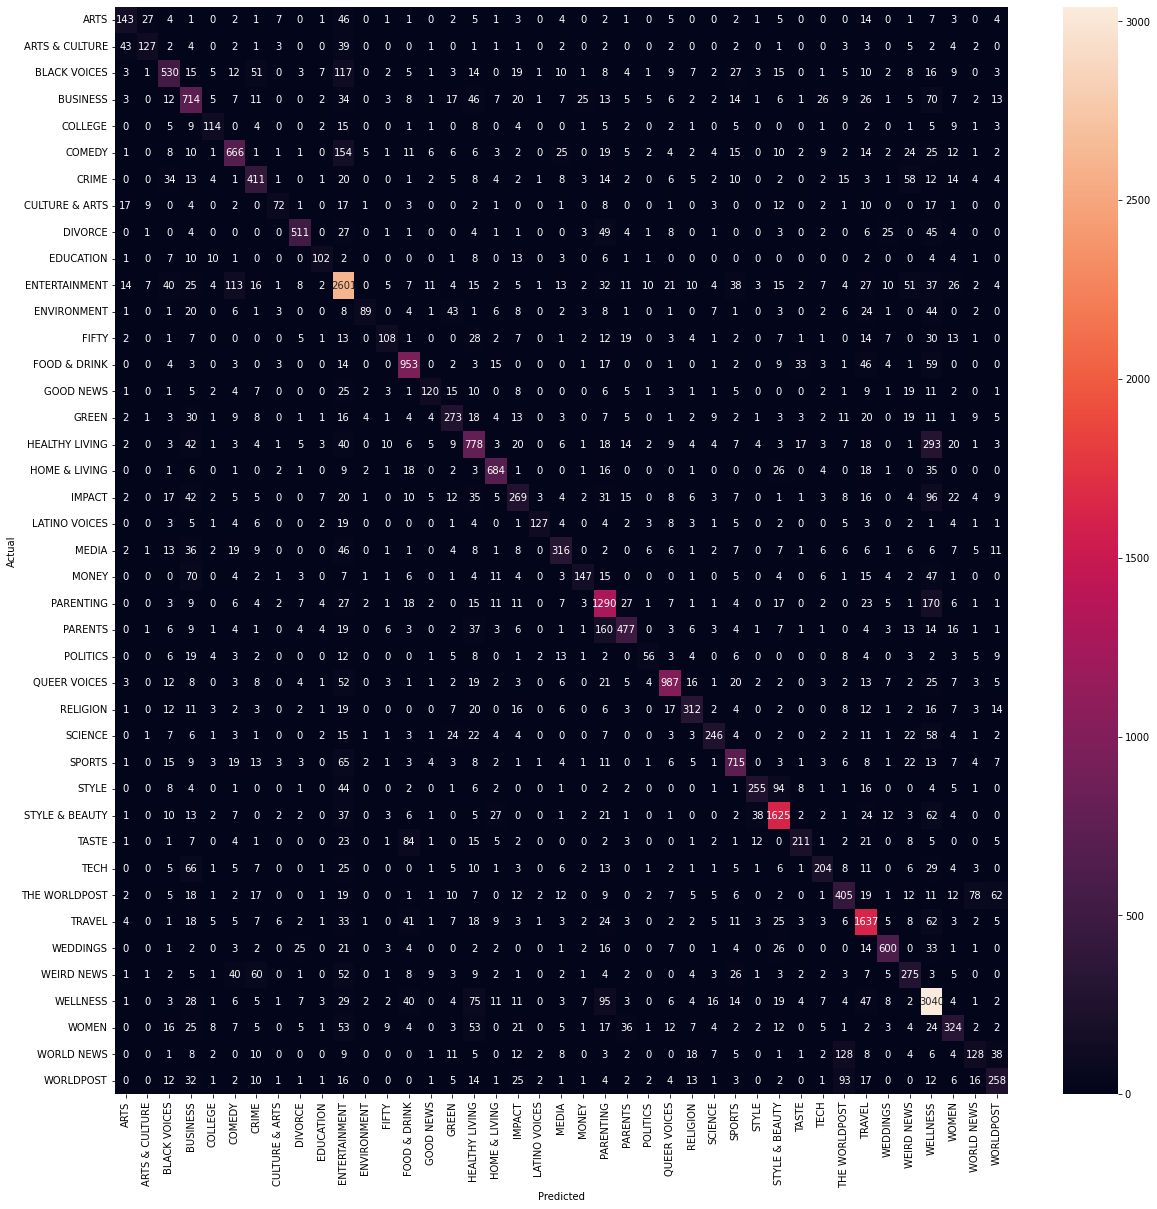

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
cm = metrics.confusion_matrix(y_test,lr.predict(x_test))

sns.heatmap(cm, annot=True, fmt='d',xticklabels=label, yticklabels=label)

plt.ylabel('Actual')
plt.xlabel('Predicted')

## 5.0 Final Note<a class="anchor" id="H5.0"></a>
1. This confusion matrix further shows how the model misclassifies amongst similar categories. Let's discuss a couple cases.
  - `Healthy Living` got misclassified into `Wellness`: since they are of similar group, so misclassification is expected. One thing worthy noticing is that `Wellness` article is less likely to be misclassifed into `Healthy Living`. It probably indicates that `Healthy Living` might be a subgroup to `Wellness` in the sample. This requires further analysis to confirm this.
  - Many categories misclassified into `Entertainment` (a lot of false positive): From the GLM feature selections, `Entertainment` used 3621 features and 192 unused features. It is the group used most features amongst other i.e. there is no distinct keywords specificially identify this group; therefore, this group is board. That might be a reason why many categories got misclassified into `Entertainment`.
2. In reality, same text might be tagged with multiple categories. In this case, the text would not be linearly seperable. Then we may need to formulate multi-tagging as a regression problem, instead of classification, so that a value indicating the liklihood for each class will be assigned by the model.
3. In practice, author intention expressed in the text usually ambiguous. Further feature engineering might be required to extract more high level features. In this example, we only use TF-IDF and 1&2-gram. Other high-level features e.g. topic feature through matrix factorization, Word Embedding, Deep Learning, might be required to improve classification accuracy.
4. During this study, the model fitting turned out to be challenging. If we use the default settings e.g. `tol` & `max_iter` of the `LogisticRegressionCV`, the model took too long or even failed to converge. By compounding the memory issues, it becomes an issue to find a workable range of parameters to get a basic model like GLM to work.  
  - Theoretcially optimizing GLM is a standard convex optimization i.e. the error surface is convex, so it should work reasonably well. It seems that the error surface might be flat and took longer time to converge. Secondly we might need to research into the `LogisticRegressionCV` implementation to see what can be done to improve this efficiency e.g. using different optimizer.
  - Optimization can be done in a cluster usig Spark MLlib. It could provide more robust outcome.